In [1]:
#importing dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
import os

## Training and Testing data

In [2]:
#Training data
X_train = pd.read_csv("Dataset/Train/X_train.txt", sep = " ", header = None)
y_train = pd.read_csv("Dataset/Train/y_train.txt", sep = " ", header = None)

#Testing data
X_test = pd.read_csv("Dataset/Test/X_test.txt", sep = " ", header = None)
y_test = pd.read_csv("Dataset/Test/y_test.txt", sep = " ", header = None)

#activity labels
y_labels = pd.read_csv("Dataset/activity_labels.txt", header = None)

#feature labels
features = pd.read_csv("Dataset/features.txt", header = None)

In [3]:
X_train.shape

(7767, 561)

In [4]:
X_test.shape

(3162, 561)

In [5]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [6]:
y_train_shaped=y_train.values.reshape(-1,1)
y_train_shaped

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]])

In [7]:
y_train=y_train.iloc[:,0]
y_train.shape

(7767,)

In [8]:
y_train_shaped.shape

(7767, 1)

In [9]:
y_test_shaped=y_test.values.reshape(-1,1)
y_test_shaped

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]])

In [10]:
y_test=y_test.iloc[:,0]
y_test.shape

(3162,)

In [11]:
y_test.head()

0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64

KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data
# #https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape/53723929

# # Convert the dataframe to a numpy array for Keras
# # (the given dataset was already an array, so I didnt need to call .value.)
# X_train = X_train.values
# y_train =y_train.values.ravel()
# X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))


In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.865
k: 51, Train/Test Score: 0.930/0.879
k: 101, Train/Test Score: 0.905/0.858
k: 151, Train/Test Score: 0.889/0.845


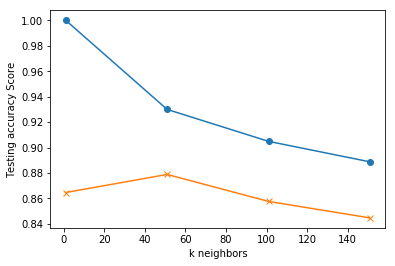

In [15]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 201, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 201, 50), train_scores, marker='o')
plt.plot(range(1, 201, 50), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 81, Train/Test Score: 0.913/0.863
k: 91, Train/Test Score: 0.910/0.857
k: 101, Train/Test Score: 0.905/0.858
k: 111, Train/Test Score: 0.902/0.855
k: 121, Train/Test Score: 0.898/0.853
k: 131, Train/Test Score: 0.894/0.851


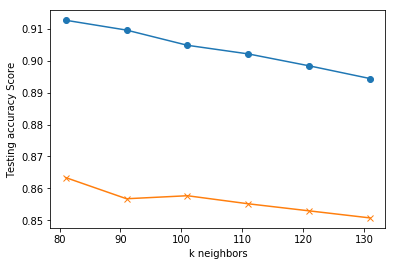

In [16]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(81, 141, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(81, 141, 10), train_scores, marker='o')
plt.plot(range(81, 141, 10), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 121, Train/Test Score: 0.898/0.853
k: 123, Train/Test Score: 0.897/0.851
k: 125, Train/Test Score: 0.896/0.853
k: 127, Train/Test Score: 0.896/0.852
k: 129, Train/Test Score: 0.895/0.851
k: 131, Train/Test Score: 0.894/0.851
k: 133, Train/Test Score: 0.894/0.850
k: 135, Train/Test Score: 0.894/0.849
k: 137, Train/Test Score: 0.893/0.847
k: 139, Train/Test Score: 0.892/0.846
k: 141, Train/Test Score: 0.892/0.846
k: 143, Train/Test Score: 0.891/0.846
k: 145, Train/Test Score: 0.890/0.845
k: 147, Train/Test Score: 0.890/0.845
k: 149, Train/Test Score: 0.889/0.844


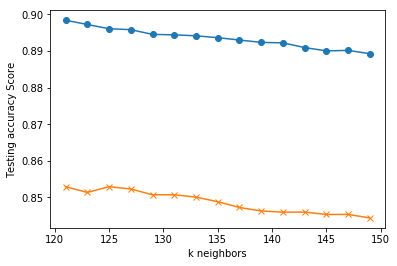

In [17]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(121, 151, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(121, 151, 2), train_scores, marker='o')
plt.plot(range(121, 151, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

k: 7, Train/Test Score: 0.970/0.892
k: 8, Train/Test Score: 0.966/0.886
k: 9, Train/Test Score: 0.965/0.889
k: 10, Train/Test Score: 0.965/0.888
k: 11, Train/Test Score: 0.963/0.891
k: 12, Train/Test Score: 0.962/0.885


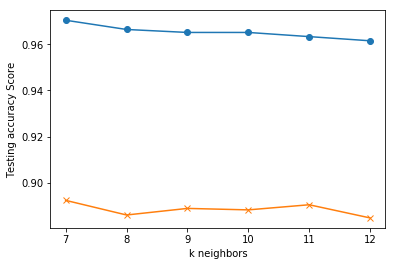

In [18]:
train_scores = []
test_scores = []
for k in range(7, 13, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(7, 13, 1), train_scores, marker='o')
plt.plot(range(7, 13, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Optimized k=10, 125, 131

In [19]:
# Note that k: 10 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('k=10 Test Acc: %.3f' % knn.score(X_test, y_test))

k=10 Test Acc: 0.888


In [20]:
knn = KNeighborsClassifier(n_neighbors=125)
knn.fit(X_train, y_train)
print('k=125 Test Acc: %.3f' % knn.score(X_test, y_test))

k=125 Test Acc: 0.853


In [21]:
knn = KNeighborsClassifier(n_neighbors=131)
knn.fit(X_train, y_train)
print('k=131 Test Acc: %.3f' % knn.score(X_test, y_test))

k=131 Test Acc: 0.851
